In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"rosh05032001","key":"0684e1839ccedea0779e4cec79194e29"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! kaggle datasets download rakeshrau/social-network-ads

Dataset URL: https://www.kaggle.com/datasets/rakeshrau/social-network-ads
License(s): unknown
  0% 0.00/3.27k [00:00<?, ?B/s]
100% 3.27k/3.27k [00:00<00:00, 6.79MB/s]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from collections import Counter

In [ ]:
df=pd.read_csv('/content/social-network-ads.zip')

In [ ]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df=df.iloc[:,1:]

In [ ]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [ ]:
encoder=LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [ ]:
scaler=StandardScaler()
X=df.iloc[:,0:3].values
X=scaler.fit_transform(X)
X

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [ ]:
y=df.iloc[:,-1].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.925


In [ ]:
class Knn:
  def __init__(self,k=5):
    self.n_neighbors=k
    self.X_train=None
    self.y_train=None

  def fit(self,X_train,y_train):
    self.X_train=X_train
    self.y_train=y_train

  def predict(self,X_test):
    y_pred=[]
    for i in X_test:
      # calculate distance with each training point
      distances=[]
      for j in self.X_train:
        distances.append(self.calculate_distance(i,j))
      n_neighbors=sorted(list(enumerate(distances)),key=lambda x:x[1])[0:self.n_neighbors]  # enumerate index lga dega hr distance ke sth ki wo kis test point ka distance training wle point ke sth
      label=self.majority_count(n_neighbors)
      y_pred.append(label)
    return np.array(y_pred)

  def calculate_distance(self,point_A,point_B):
    return np.linalg.norm(point_A-point_B)

  def majority_count(self,neighbors):
    votes=[]
    for i in neighbors:
      votes.append(self.y_train[i[0]])
    votes=Counter(votes)
    return(votes.most_common()[0][0])




In [ ]:
meraknn=Knn(5)
meraknn.fit(X_train,y_train)
y_pred1=meraknn.predict(X_test)
print(accuracy_score(y_test,y_pred1))

0.925


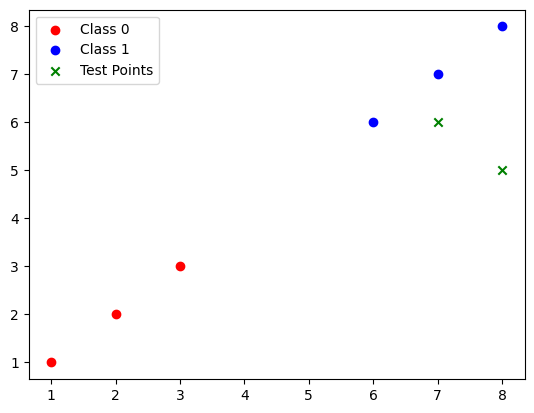

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create training data (features and labels)
X_train = np.array([[1, 1], [2, 2], [3, 3], [6, 6], [7, 7], [8, 8]])
y_train = np.array([0, 0, 0, 1, 1, 1])  # Labels: 0 or 1

# Create test data
X_test = np.array([[8, 5], [7, 6]])



# Visualize the data
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Class 1')
plt.scatter(X_test[:, 0], X_test[:, 1], color='green', label='Test Points', marker='x')
plt.legend()
plt.show()


In [ ]:
meraknn=Knn(5)
meraknn.fit(X_train,y_train)
y_pred1=meraknn.predict(X_test)
y_pred1

array([1, 1])

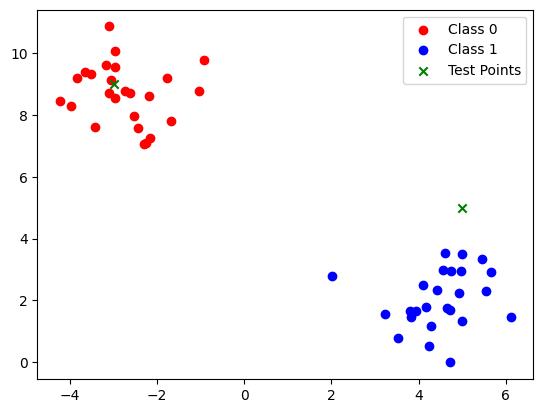

In [ ]:
from sklearn.datasets import make_blobs

# Generate random clusters of data
X_train, y_train = make_blobs(n_samples=50, centers=2, cluster_std=1.0, random_state=42)

# Generate test points
X_test = np.array([[-3, 9], [5, 5]])

# Visualize the data
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Class 1')
plt.scatter(X_test[:, 0], X_test[:, 1], color='green', label='Test Points', marker='x')
plt.legend()
plt.show()


In [ ]:
meraknn=Knn(5)
meraknn.fit(X_train,y_train)
y_pred1=meraknn.predict(X_test)
y_pred1

array([0, 1])